Accuracy: 0.6163793103448276
F1 Score: 0.6111981939051057
Precision: 0.6099045568992005
Recall: 0.6163793103448276
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           1       0.54      0.47      0.50        96

    accuracy                           0.62       232
   macro avg       0.60      0.59      0.60       232
weighted avg       0.61      0.62      0.61       232

{'n_neighbors': 2}
Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276


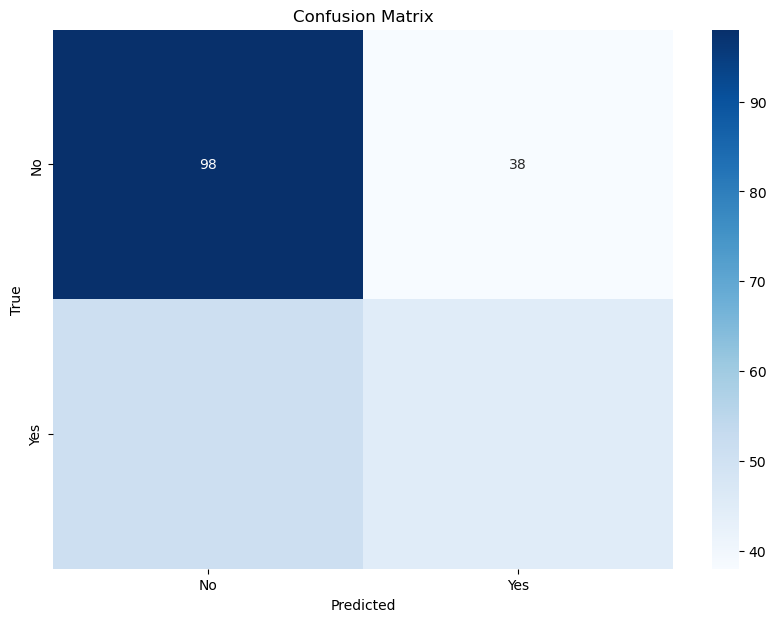

Analysis of the k-NN Model Results:
Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class 'No': Precision = 0.6577181208053692, Recall = 0.7205882352941176, F1 Score = 0.6877192982456141
Class 'Yes': Precision = 0.5421686746987951, Recall = 0.46875, F1 Score = 0.5027932960893854


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\HospitalDatasets.csv")

# Select the target column 
target = 'Readmission'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)


# Training accuracy
train_accuracy = knn.score(X_train, y_train)
# Testing accuracy
test_accuracy = knn.score(X_test, y_test)



# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Analyze and discuss the results
def analyze_results(y_test, y_pred):
    print("Analysis of the k-NN Model Results:")
    
    # Check for underfitting
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    # Check for overfitting by comparing training and test accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    # Analyze class-specific performance
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

analyze_results(y_test, y_pred)



k-NN Classifier Results:
Accuracy: 0.6163793103448276
F1 Score: 0.6111981939051057
Precision: 0.6099045568992005
Recall: 0.6163793103448276
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           1       0.54      0.47      0.50        96

    accuracy                           0.62       232
   macro avg       0.60      0.59      0.60       232
weighted avg       0.61      0.62      0.61       232

Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276


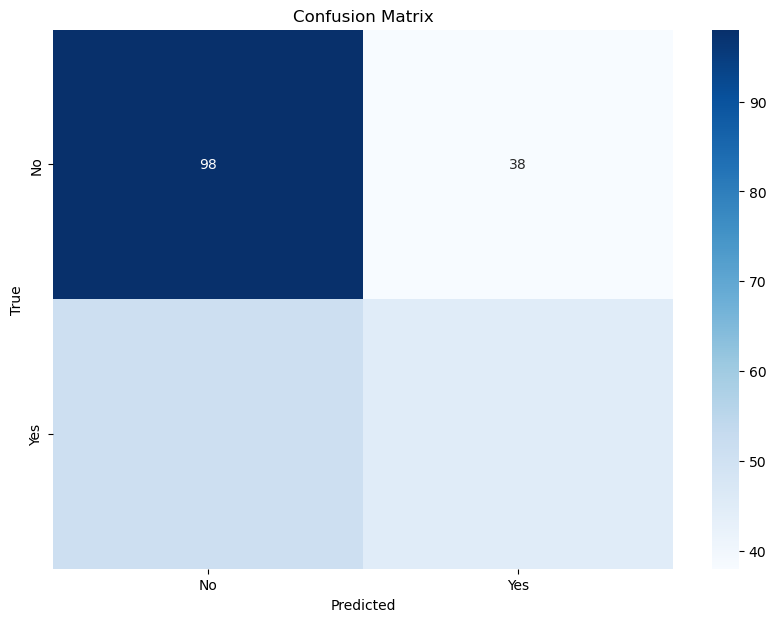

Decision Tree Classifier Results:
Accuracy: 0.5905172413793104
F1 Score: 0.5913837476457654
Precision: 0.5924450624995089
Recall: 0.5905172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       136
           1       0.51      0.52      0.51        96

    accuracy                           0.59       232
   macro avg       0.58      0.58      0.58       232
weighted avg       0.59      0.59      0.59       232

Training Accuracy: 1.0
Testing Accuracy: 0.5905172413793104


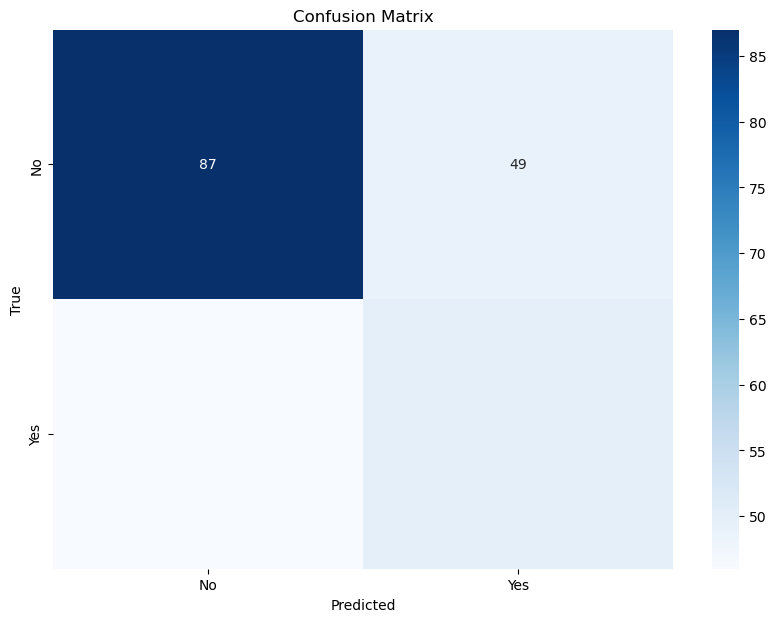

SVM Classifier Results:
Accuracy: 0.646551724137931
F1 Score: 0.6141522988505748
Precision: 0.6463643178410795
Recall: 0.646551724137931
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.74       136
           1       0.65      0.32      0.43        96

    accuracy                           0.65       232
   macro avg       0.65      0.60      0.59       232
weighted avg       0.65      0.65      0.61       232

Training Accuracy: 0.6968576709796673
Testing Accuracy: 0.646551724137931


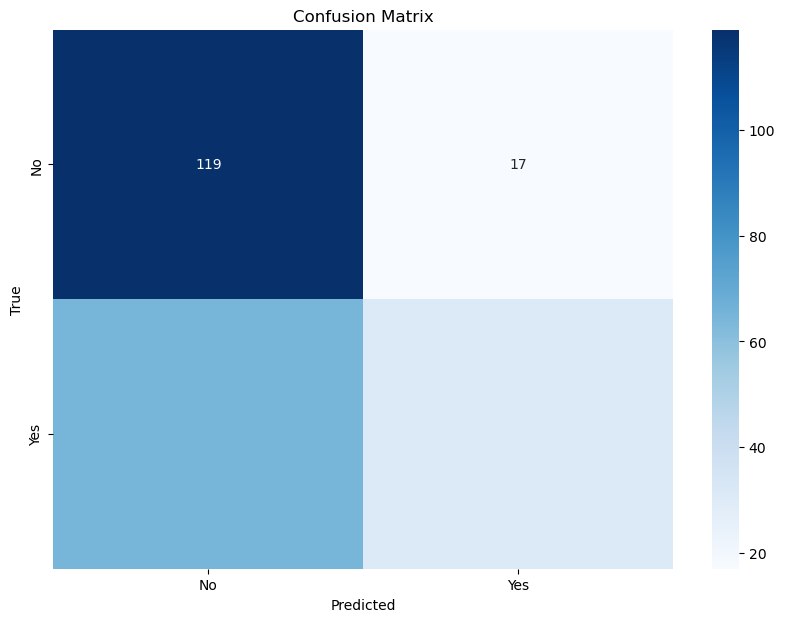

Best parameters for k-NN: {'n_neighbors': 2}
Analysis of the Model Results:
Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class 'No': Precision = 0.6577181208053692, Recall = 0.7205882352941176, F1 Score = 0.6877192982456141
Class 'Yes': Precision = 0.5421686746987951, Recall = 0.46875, F1 Score = 0.5027932960893854


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\HospitalDatasets.csv")

# Select the target column 
target = 'Readmission'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Classification Report:\n", classification_rep)

    # Training accuracy
    train_accuracy = model.score(X_train, y_train)
    # Testing accuracy
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return train_accuracy, test_accuracy

# k-NN Classifier
print("k-NN Classifier Results:")
knn = KNeighborsClassifier(n_neighbors=3)
knn_train_acc, knn_test_acc = evaluate_model(knn, X_train, y_train, X_test, y_test)

# Decision Tree Classifier
print("Decision Tree Classifier Results:")
dt = DecisionTreeClassifier(random_state=42)
dt_train_acc, dt_test_acc = evaluate_model(dt, X_train, y_train, X_test, y_test)

# SVM Classifier
print("SVM Classifier Results:")
svm = SVC(kernel='linear', random_state=42)
svm_train_acc, svm_test_acc = evaluate_model(svm, X_train, y_train, X_test, y_test)

# Hyperparameter tuning for k-NN
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters for k-NN:", grid_search.best_params_)

# Analyze and discuss the results
def analyze_results(model, X_train, y_train, X_test, y_test):
    print("Analysis of the Model Results:")
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

# Analyzing results for the best performing model
analyze_results(knn, X_train, y_train, X_test, y_test)


Accuracy: 0.6163793103448276
F1 Score: 0.6111981939051057
Precision: 0.6099045568992005
Recall: 0.6163793103448276
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           1       0.54      0.47      0.50        96

    accuracy                           0.62       232
   macro avg       0.60      0.59      0.60       232
weighted avg       0.61      0.62      0.61       232

Best parameters found by Grid Search: {'n_neighbors': 2}
Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276


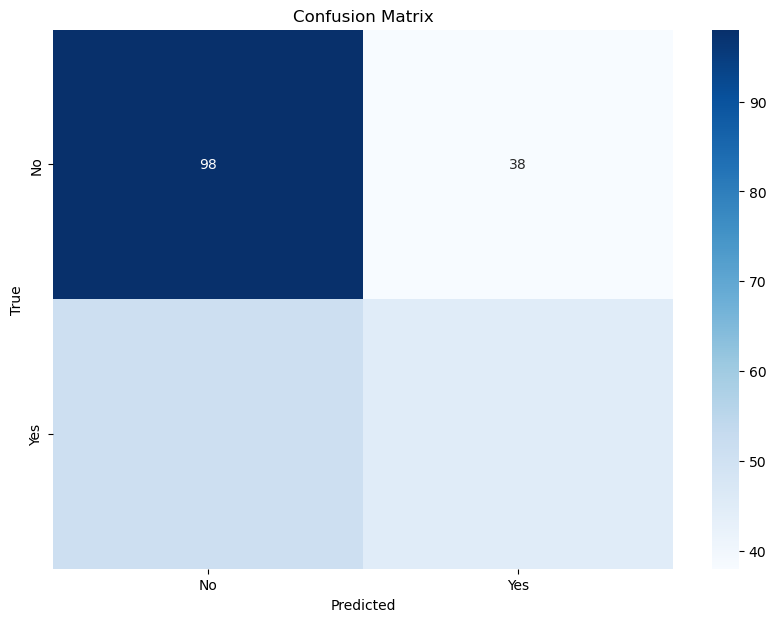

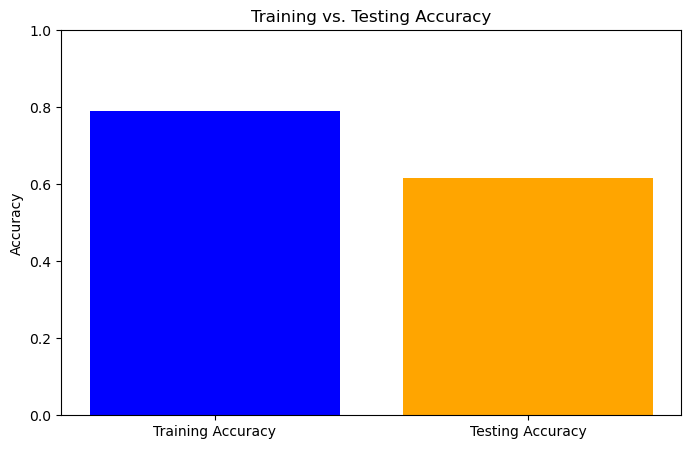

Plotting class-specific performance metrics...


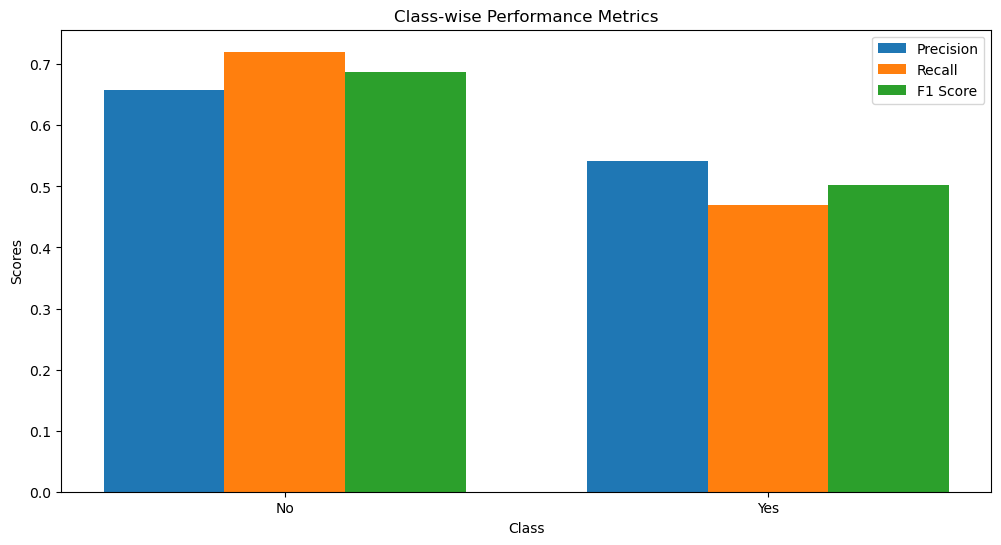

Analysis of the k-NN Model Results:
Training Accuracy: 0.7911275415896488
Testing Accuracy: 0.6163793103448276
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class 'No': Precision = 0.6577181208053692, Recall = 0.7205882352941176, F1 Score = 0.6877192982456141
Class 'Yes': Precision = 0.5421686746987951, Recall = 0.46875, F1 Score = 0.5027932960893854


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\HospitalDatasets.csv")

# Select the target column 
target = 'Readmission'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

# Training accuracy
train_accuracy = knn.score(X_train, y_train)
# Testing accuracy
test_accuracy = knn.score(X_test, y_test)

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found by Grid Search:", grid_search.best_params_)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot class-specific performance metrics
def plot_class_performance(y_test, y_pred):
    print("Plotting class-specific performance metrics...")
    class_labels = target_encoder.classes_
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for class_label in class_labels:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        precision_scores.append(class_precision)
        recall_scores.append(class_recall)
        f1_scores.append(class_f1)

    x = np.arange(len(class_labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width, precision_scores, width, label='Precision')
    bars2 = ax.bar(x, recall_scores, width, label='Recall')
    bars3 = ax.bar(x + width, f1_scores, width, label='F1 Score')

    ax.set_xlabel('Class')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.show()

plot_class_performance(y_test, y_pred)

# Analyze and discuss the results
def analyze_results(y_test, y_pred):
    print("Analysis of the k-NN Model Results:")
    
    # Check for underfitting
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    # Check for overfitting by comparing training and test accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    # Analyze class-specific performance
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

analyze_results(y_test, y_pred)
